In [1]:
#Importing needed libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
#Reding the data from file
df=pd.read_csv("Country-data.csv")

In [3]:
#Glance the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Get the number of rows and colums
df.shape

(167, 10)

In [5]:
#To get number of records and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#To get statistical insights
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
#Check number of missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
#Converting exports,imports and health spending percentages to absolute values.
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Performing EDA

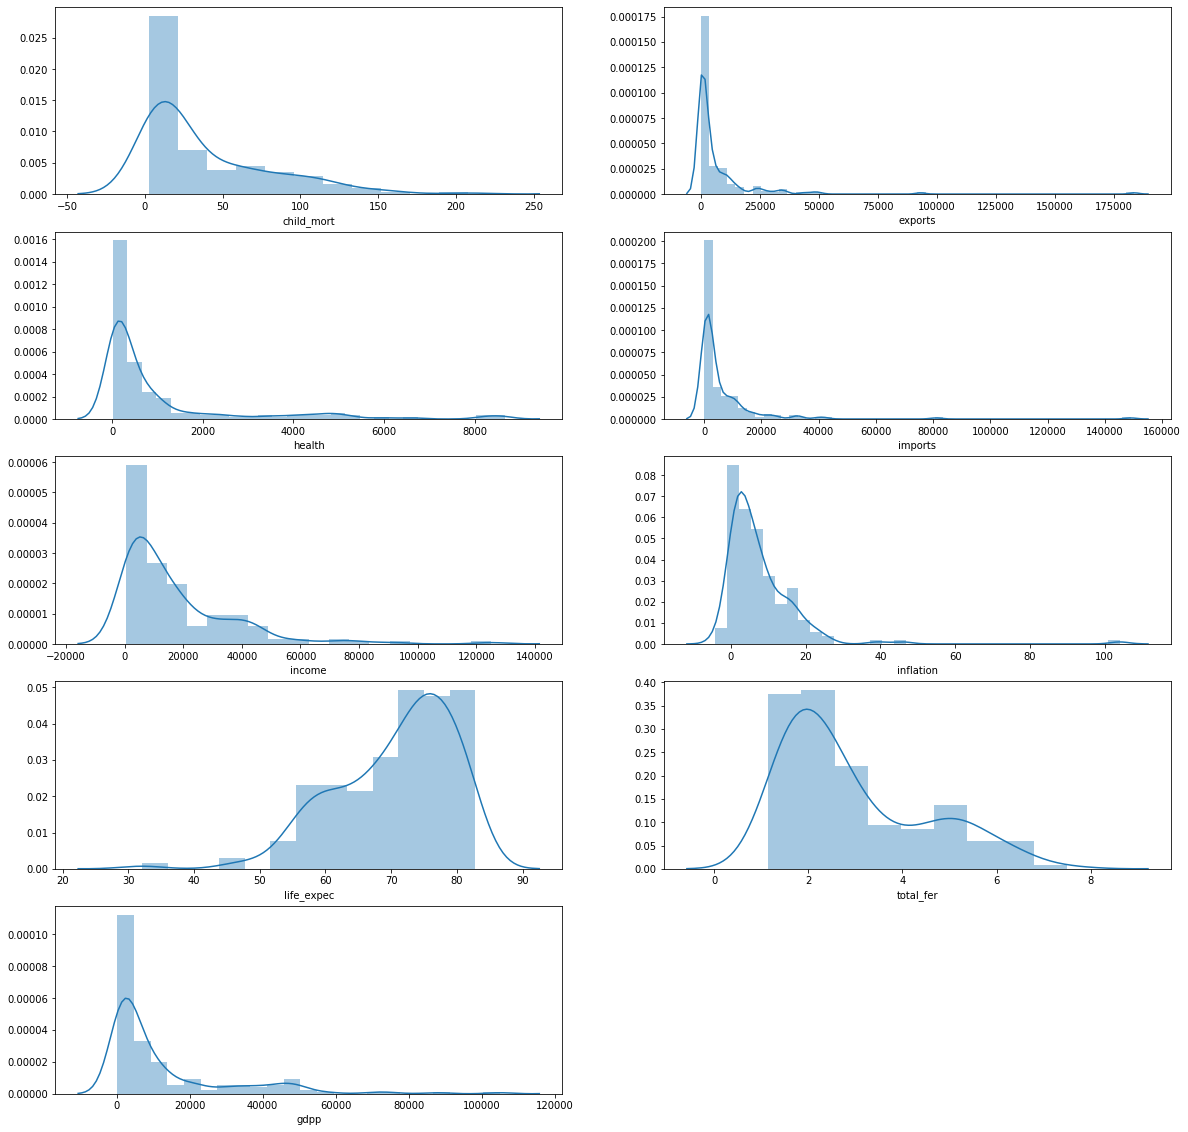

In [10]:
#Performing EDA
plt.figure(figsize = (20,20))
f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(df[i[1]])

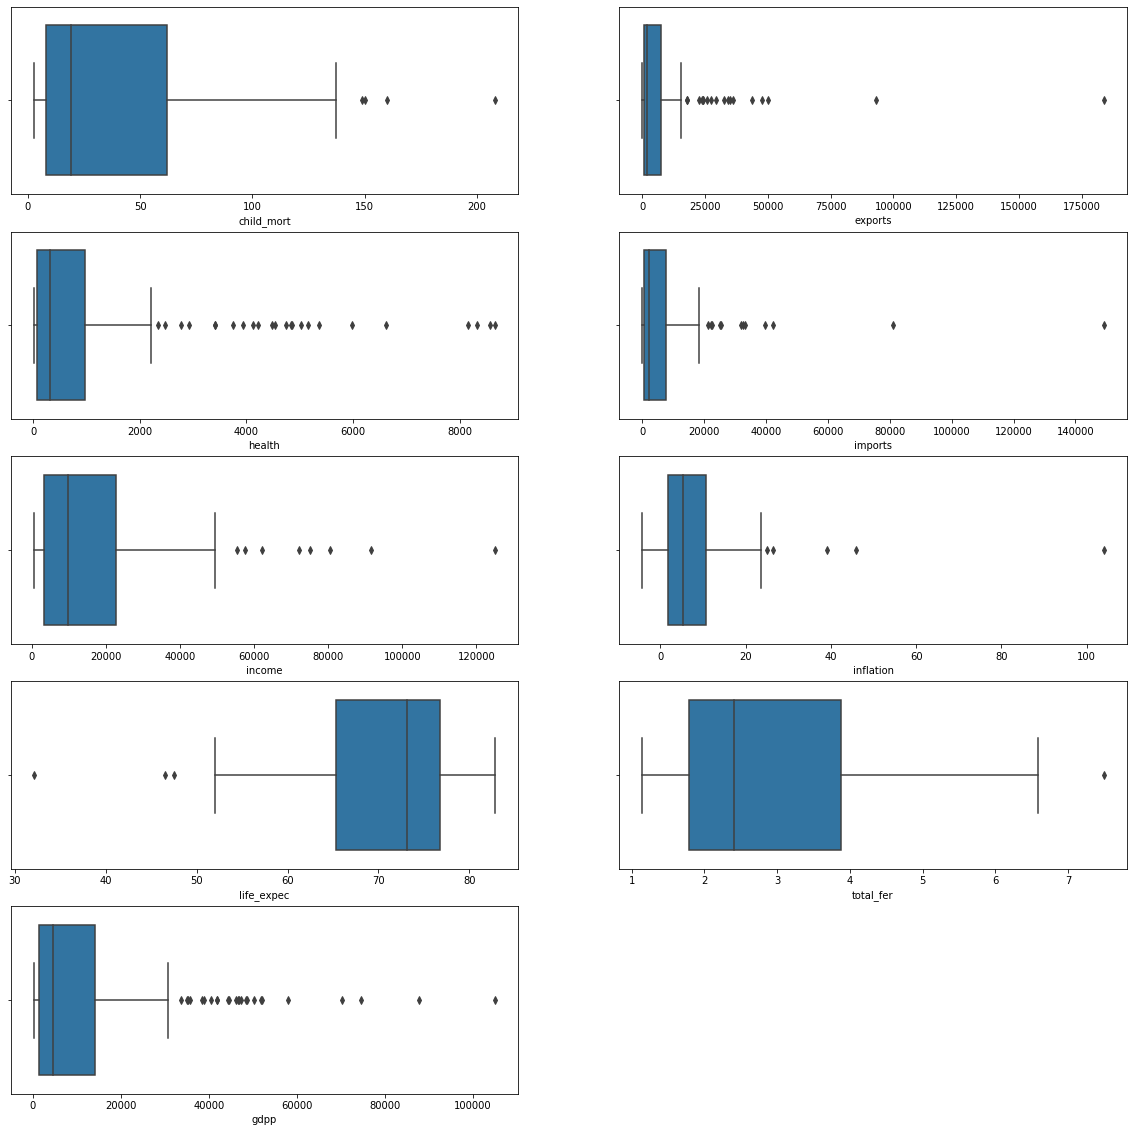

In [11]:
plt.figure(figsize = (20,20))
f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x = i[1], data =df)

### Here we found that health,gdpp and export column has many outliers. But if we remove these outliers it would remove many country details. So we decide to keep all the data

## Multivariate Analysis

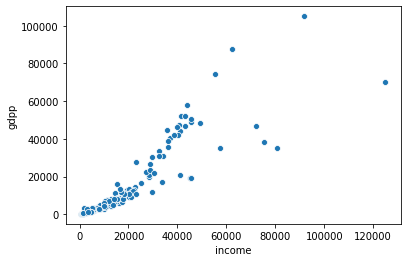

In [12]:
sns.scatterplot(x='income',y='gdpp',data=df)
plt.show()

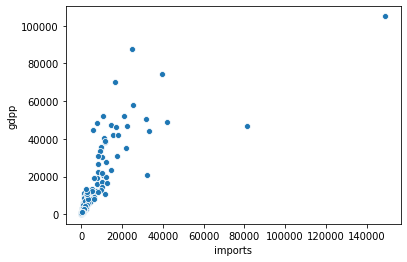

In [13]:
sns.scatterplot(x='imports',y='gdpp',data=df)
plt.show()

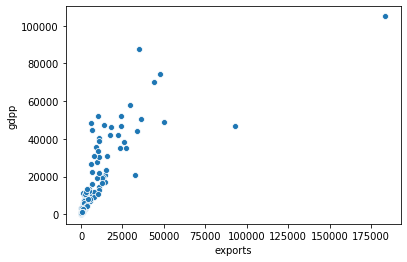

In [14]:
sns.scatterplot(x='exports',y='gdpp',data=df)
plt.show()

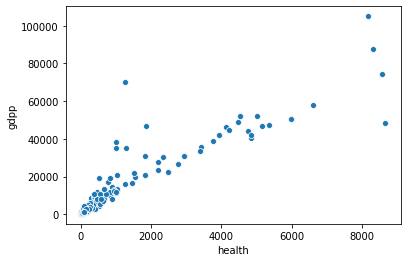

In [15]:
sns.scatterplot(x='health',y='gdpp',data=df)
plt.show()

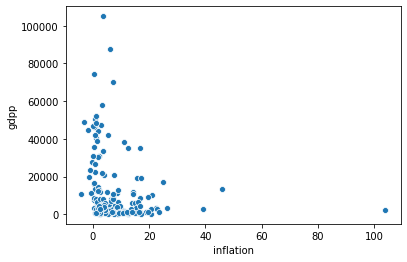

In [16]:
sns.scatterplot(x='inflation',y='gdpp',data=df)
plt.show()

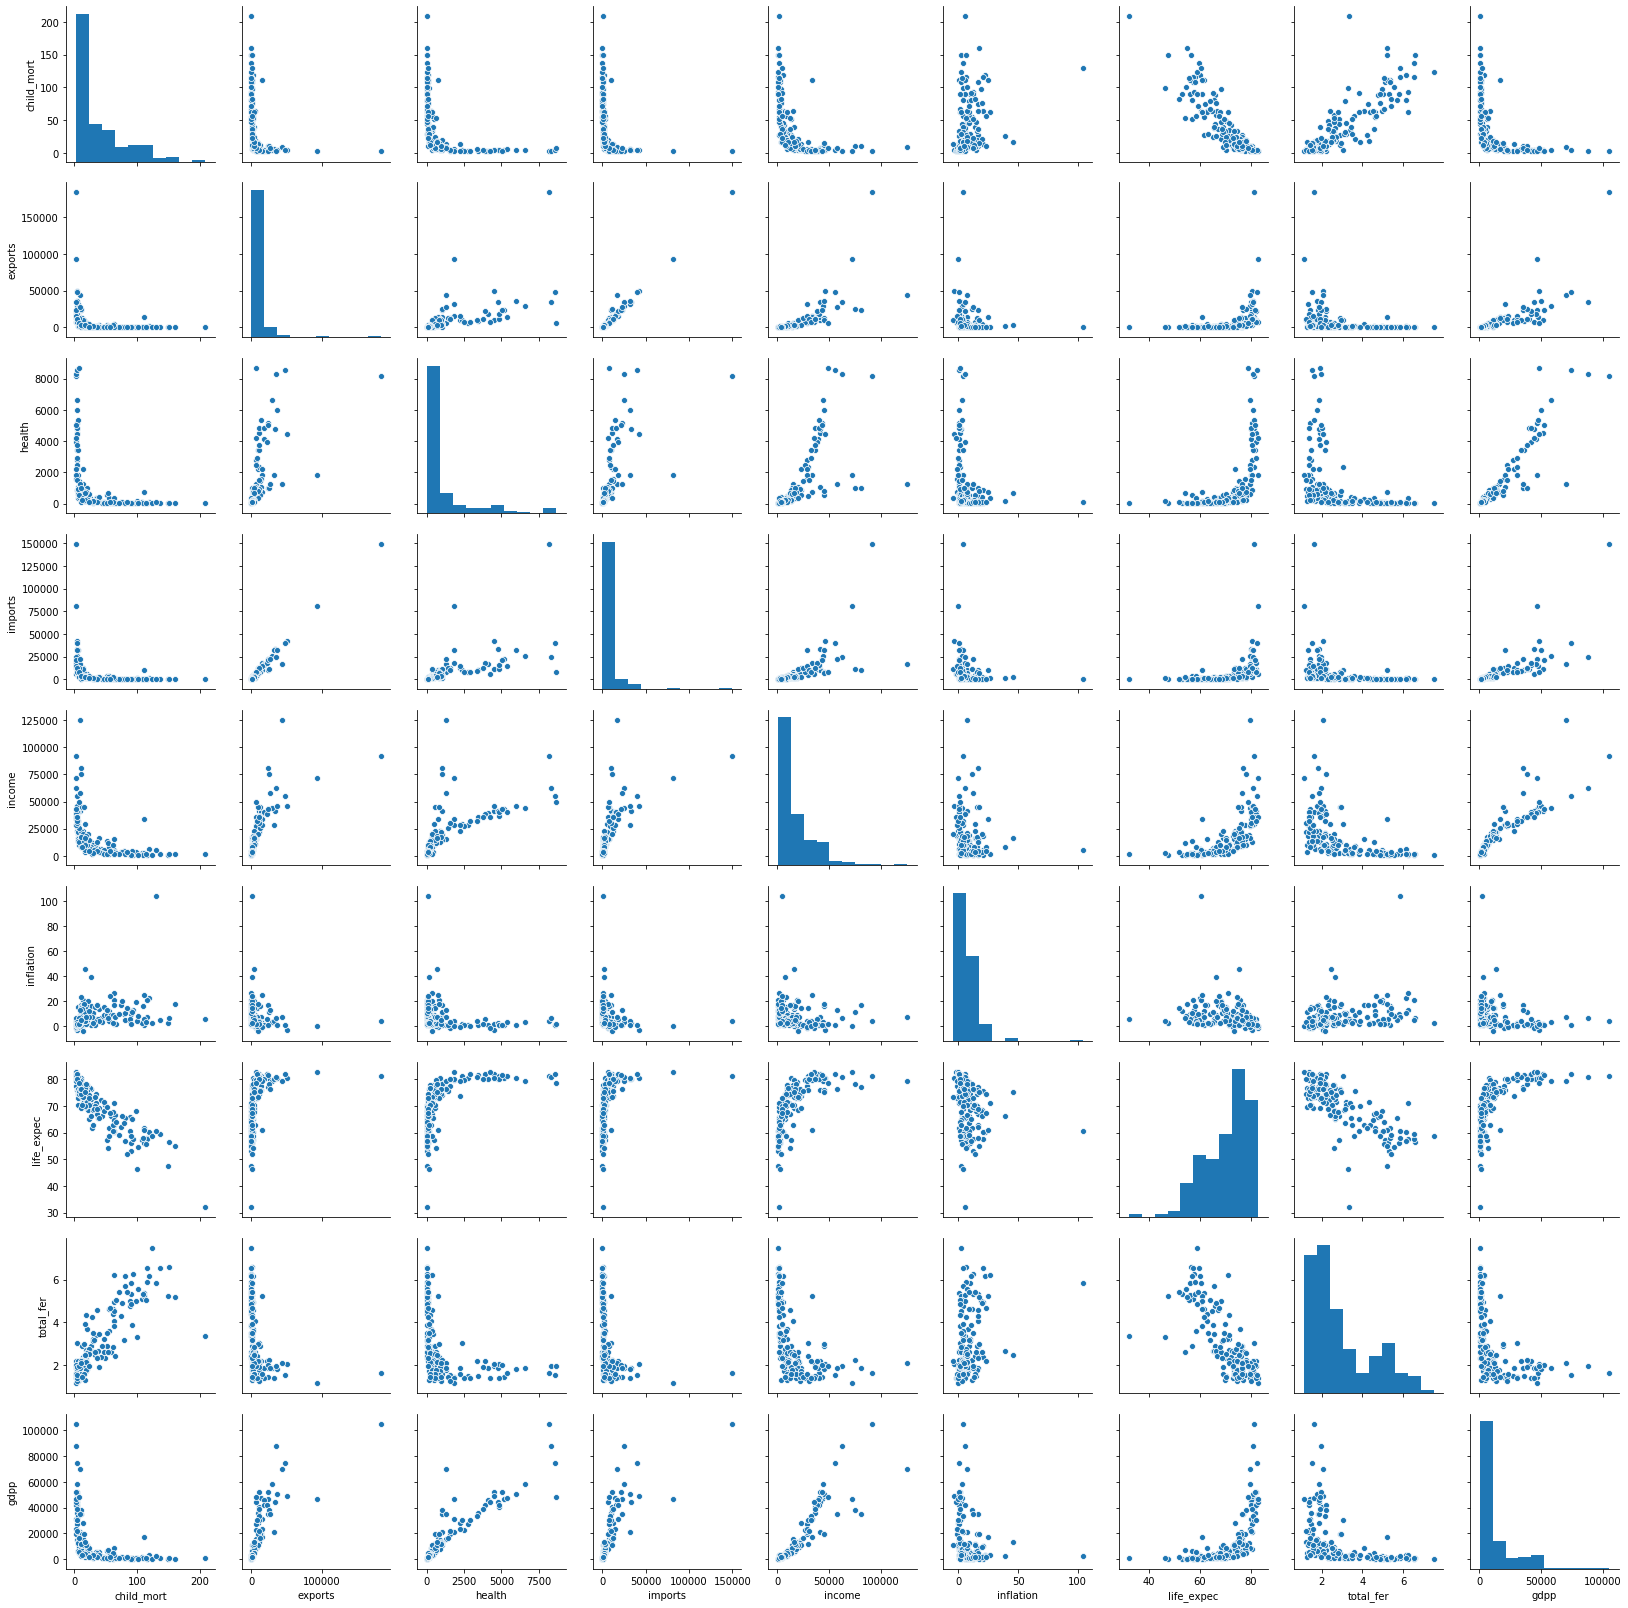

In [17]:
#Plotting pair plot
pair=df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
sns.pairplot(pair)
plt.show()

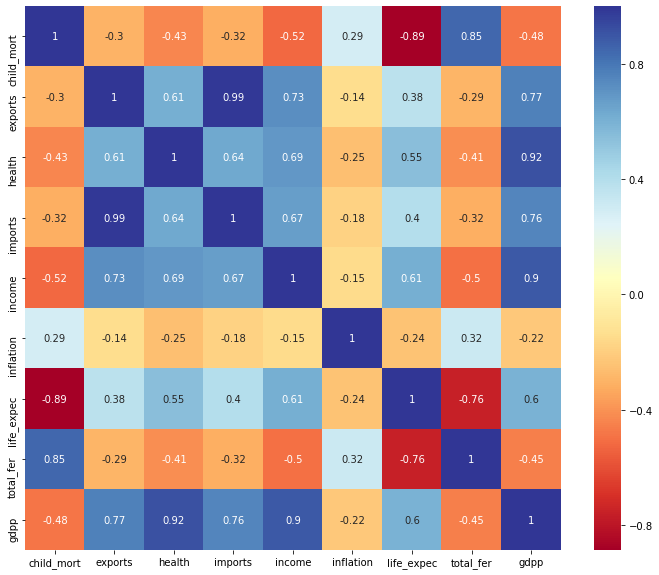

In [18]:
# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (12,10))  
ax=sns.heatmap(df.corr(),annot = True,cmap="RdYlBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### We found that health and income are closely corelated with GDPP

In [19]:
dfcopy=df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

# Performing Hopkins Statistics

In [20]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
hopkins(dfcopy)

0.8873843204890283

Since we found that Hopkins value is 0.97  it has a high tendency to cluster.

In [22]:
# Creating new df with thsese columns
newdf = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
newdf_scaled = scaler.fit_transform(newdf)
newdf_scaled.shape

(167, 9)

In [23]:
#Displaying scaled data frama
newdf_scaled = pd.DataFrame(newdf_scaled)
newdf_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
newdf_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# Finding the number of clusters by 
1)Silhoutte Score
#2)By Elbow Curve

In [24]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(newdf_scaled)
    sse_.append([k, silhouette_score(newdf_scaled, kmeans.labels_)])

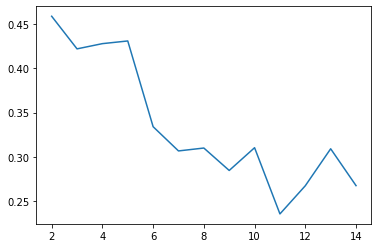

In [25]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### Here we found that spike is at 5. So we can have 5 as number of clusters

In [26]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(newdf_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(newdf_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.3972994897296499
For n_clusters=7, the silhouette score is 0.30129256506906793
For n_clusters=8, the silhouette score is 0.30347130034893205


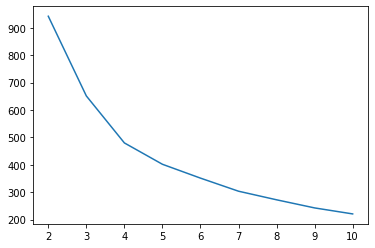

In [27]:
## Elbow Cuve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(newdf_scaled)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

### Creating the the cluster by using K means and choosing 5 as number of clusters

In [28]:
kmean = KMeans(n_clusters = 5, random_state = 0)
kmean.fit(newdf_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [29]:
#Assigning cluster name(0,1,2,3,4) to the main data frame
df['cluster_id'] = kmean.labels_

In [30]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


## Lets Visualise the Clusters

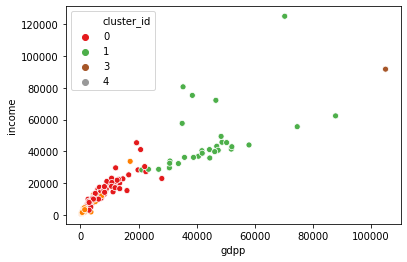

In [31]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = df, palette ='Set1')

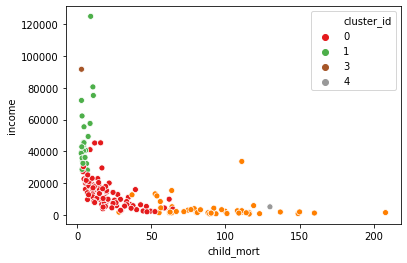

In [32]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = df, palette ='Set1')

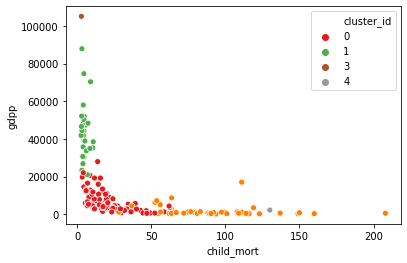

In [33]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id', data = df, palette ='Set1')

In [34]:
#Grouping the columns by their cluster id
df[['gdpp', 'income', 'child_mort','cluster_id']].groupby('cluster_id').mean()

,gdpp,income,child_mort
cluster_id,,,
0,7332.636364,13455.568182,20.918182
1,44103.333333,46676.666667,5.006667
2,1900.255319,3870.702128,90.793617
3,105000.000000,91700.000000,2.800000
4,2330.000000,5150.000000,130.000000


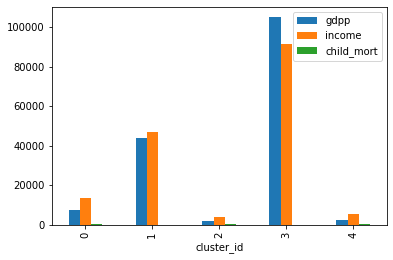

In [35]:
#Plotting based on cluster id to find the least ones 
df[['gdpp', 'income', 'child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

In [36]:
#We found that cluster 2 has less gdpp,income values
finalCluster = df[df['cluster_id']==2]

In [37]:
finalCluster

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,2
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,2


In [38]:
#Top 5 countries that needs aid
finalCluster.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2


## Hierarchical Clustering

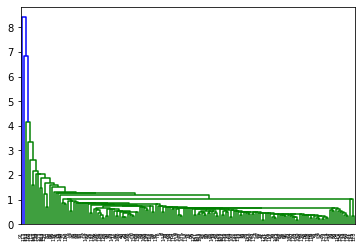

In [39]:
# Clustering by single linkage
mergings = linkage(newdf_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

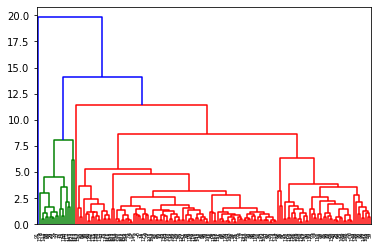

In [40]:
#Hierachical Clustering
# complete linkage
mergings = linkage(newdf_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [41]:
#Cutting dendograms with 5 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )

In [42]:
# assign cluster labels
df['Hierchical_cluster_id'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Hierchical_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1


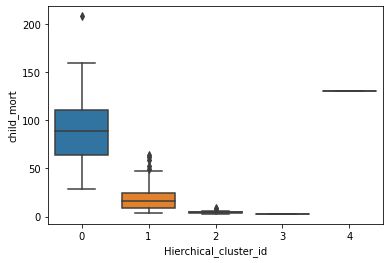

In [43]:
sns.boxplot(x='Hierchical_cluster_id', y='child_mort', data=df)

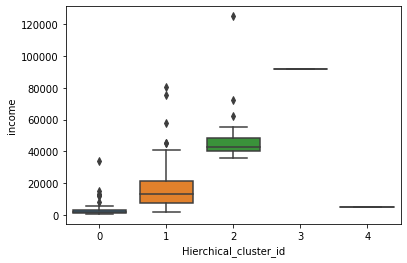

In [44]:
sns.boxplot(x='Hierchical_cluster_id', y='income', data=df)

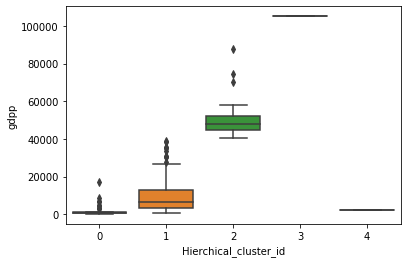

In [45]:
sns.boxplot(x='Hierchical_cluster_id', y='gdpp', data=df)

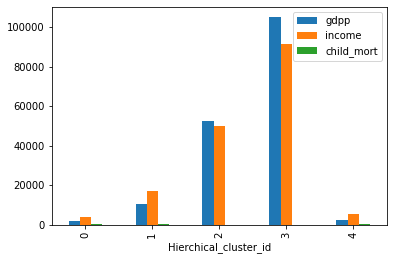

In [46]:
df[['gdpp', 'income', 'child_mort','Hierchical_cluster_id']].groupby('Hierchical_cluster_id').mean().plot(kind = 'bar')

In [47]:
finalHierachicalCluster = df[df['Hierchical_cluster_id']==0]

In [48]:
finalHierachicalCluster.country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [49]:
finalHierachicalCluster.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Hierchical_cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,2,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,2,0


## We found that the country names that we got are same in both K means and Hierarchical Clustering

## So top 10 country names that need financial aid are:
1)Burundi 

2)Liberia 

3)Congo, Dem. Rep. 

4)Niger

5)Sierra Leone

6)Madagascar

7)Mozambique

8)Central African Republic

9)Malawi

10)Eritrea

